In [1]:
'''Q1. Load all of the dimension tables from e-comdata-set2.xlsx into the pandas dataframe. 
a. Calculate the mean value of the total price of the fact table.
b. Calculate the standard deviation of all columns of the fact table.
c.  Find the most common store size in the store dimension.'''

'Q1. Load all of the dimension tables from e-comdata-set2.xlsx into the pandas dataframe. \na. Calculate the mean value of the total price of the fact table.\nb. Calculate the standard deviation of all columns of the fact table.\nc.  Find the most common store size in the store dimension.'

In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
fact_table = pd.read_excel(r'e-comdata-set2.xlsx', sheet_name='Fact_table', engine='openpyxl')

In [4]:
fact_table = pd.read_excel(r'e-comdata-set2.xlsx', sheet_name='Fact_table', engine='openpyxl')
trans_dim = pd.read_excel(r'e-comdata-set2.xlsx', sheet_name='Trans_dim', engine='openpyxl')
item_dim = pd.read_excel(r'e-comdata-set2.xlsx', sheet_name='Item_dim', engine='openpyxl')
customer_dim = pd.read_excel(r'e-comdata-set2.xlsx', sheet_name='Customer_dim', engine='openpyxl')
time_dim = pd.read_excel(r'e-comdata-set2.xlsx', sheet_name='Time_dim', engine='openpyxl')
store_dim = pd.read_excel(r'e-comdata-set2.xlsx', sheet_name='Store_dim', engine='openpyxl')

In [5]:
mean_value = fact_table['total_price'].mean()

In [6]:
mean_value

145.971625

In [7]:
std_value =fact_table[['trans_key','customer_key','time_key','item_key','store_key','quantity','unit','unit_price','total_price']].std()

C:\Users\PLC\AppData\Local\Temp\ipykernel_3420\1079738085.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_value =fact_table[['trans_key','customer_key','time_key','item_key','store_key','quantity','unit','unit_price','total_price']].std()


In [8]:
std_value

quantity         4.019877
unit_price      10.899616
total_price    122.211823
dtype: float64

In [9]:
std_value =fact_table[['quantity','unit_price','total_price']].std()

In [10]:
std_value

quantity         4.019877
unit_price      10.899616
total_price    122.211823
dtype: float64

In [11]:
com_value = store_dim[['store_size']].mode()

In [12]:
com_value

,store_size
0,small


In [13]:
'''Q2.Find the store_size-wise monthly total sales price of all stores joining the fact table
and respective dimension table and visualize it to a bar chart'''

'Q2.Find the store_size-wise monthly total sales price of all stores joining the fact table\nand respective dimension table and visualize it to a bar chart'

In [14]:
add_time_store_with_fact = pd.merge(pd.merge(fact_table,time_dim,on='time_key'),store_dim,on='store_key')

In [15]:
add_time_store_with_fact

,trans_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,day,week,month,quarter,year,store_size,location,upazila,district,division
0,T002,C000013,T07440,I00054,S0012,3,ct,45.0,135.0,10-02-2019 12:40,...,10,2nd Week,2,Q1,2019,high,Tolarbag Panir Tanki,Companiganj,Sylhet,Sylhet
1,T005,C000001,T01880,I00053,S0012,7,ct,15.0,105.0,06-02-2014 02:13,...,6,1st Week,2,Q1,2014,high,Tolarbag Panir Tanki,Companiganj,Sylhet,Sylhet
2,T008,C000014,T00574,I00025,S0012,9,bottles,11.0,99.0,11-05-2015 15:01,...,11,2nd Week,5,Q2,2015,high,Tolarbag Panir Tanki,Companiganj,Sylhet,Sylhet
3,T009,C000016,T08410,I00047,S0012,6,ct,48.0,288.0,14-03-2019 08:37,...,14,2nd Week,3,Q1,2019,high,Tolarbag Panir Tanki,Companiganj,Sylhet,Sylhet
4,T002,C000022,T02360,I00063,S0012,10,ct,14.0,140.0,15-01-2018 08:32,...,15,3rd Week,1,Q1,2018,high,Tolarbag Panir Tanki,Companiganj,Sylhet,Sylhet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,T010,C000045,T00768,I00002,S0002,5,bottles,17.5,87.5,22-03-2019 03:07,...,22,4th Week,3,Q1,2019,small,Andamanbari,Kathalia,Jhalokathi,Barishal
9996,T001,C000020,T00463,I00016,S0002,14,bottles,18.0,252.0,19-09-2016 09:10,...,19,3rd Week,9,Q3,2016,small,Andamanbari,Kathalia,Jhalokathi,Barishal
9997,T001,C000005,T00790,I00035,S0002,2,ct,14.0,28.0,19-11-2015 18:01,...,19,3rd Week,11,Q4,2015,small,Andamanbari,Kathalia,Jhalokathi,Barishal
9998,T003,C000025,T09055,I00025,S0002,2,bottles,11.0,22.0,02-01-2021 07:43,...,2,1st Week,1,Q1,2021,small,Andamanbari,Kathalia,Jhalokathi,Barishal


In [16]:
 groupby_and_aggr_of_table = add_time_store_with_fact.groupby(['store_size', 'month']).aggregate({'total_price':'sum'})

In [17]:
groupby_and_aggr_of_table

total_price
store_size month             
high       1         37579.25
           2         36937.00
           3         44880.50
           4         39677.00
           5         35278.50
           6         40410.25
           7         38436.75
           8         32935.50
           9         37485.75
           10        40334.00
           11        36200.75
           12        40120.50
medium     1         35317.50
           2         36301.75
           3         37307.50
           4         37442.50
           5         39601.00
           6         35465.50
           7         42736.75
           8         38395.75
           9         40947.50
           10        38168.25
           11        39320.75
           12        33959.00
small      1         43056.00
           2         50925.50
           3         43197.50
           4         46250.75
           5         44293.50
           6         38937.75
           7         44008.50
           8         39850.25
           9         55398.75
           10        45017.50
           11        45773.25
           12        47767.50

Text(0, 0.5, 'Total price')

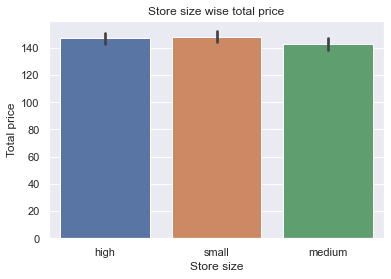

In [18]:
plt.title('Store size wise total price')
sns.barplot(x = add_time_store_with_fact['store_size'], y = add_time_store_with_fact['total_price']);
plt.xlabel('Store size')
plt.ylabel('Total price')

Text(0, 0.5, 'Total price')

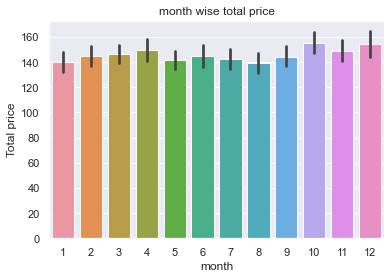

In [19]:
plt.title('month wise total price')
sns.barplot(x = add_time_store_with_fact['month'], y = add_time_store_with_fact['total_price']);
plt.xlabel('month')
plt.ylabel('Total price')

In [ ]:
Q3.Compare the quarter-wise monthly total sales price in Barishal and Sylhet divisions of
all customers joining the fact table and respective dimension tables and visualize it to
a scatter chart.

In [13]:
add_time_customer_with_fact = pd.merge(pd.merge(fact_table, time_dim, on='time_key'), customer_dim, on='customer_key')

In [14]:
add_time_customer_with_fact

,trans_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,week,month,quarter,year,name,contact_no,nid,upazila,district,division
0,T002,C000013,T07440,I00054,S0012,3,ct,45.0,135.0,10-02-2019 12:40,...,2nd Week,2,Q1,2019,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
1,T008,C000013,T07965,I00069,S0008,10,ct,32.0,320.0,20-11-2015 18:48,...,3rd Week,11,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
2,T005,C000013,T04797,I00063,S0010,8,ct,14.0,112.0,31-12-2015 02:05,...,4th Week,12,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
3,T006,C000013,T02801,I00060,S0008,9,pk,18.0,162.0,03-12-2020 15:58,...,1st Week,12,Q4,2020,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
4,T007,C000013,T04632,I00016,S0009,1,bottles,18.0,18.0,12-11-2014 20:59,...,2nd Week,11,Q4,2014,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,T004,C000037,T02461,I00053,S0010,9,ct,15.0,135.0,08-09-2018 11:14,...,2nd Week,9,Q3,2018,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9996,T010,C000037,T09156,I00005,S0008,9,bottles,20.0,180.0,19-01-2016 04:36,...,3rd Week,1,Q1,2016,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9997,T009,C000037,T02683,I00034,S0015,6,tubs,15.0,90.0,27-08-2020 23:12,...,4th Week,8,Q3,2020,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9998,T004,C000037,T09372,I00015,S0001,12,bottles,18.0,216.0,03-04-2014 10:56,...,1st Week,4,Q2,2014,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet


In [25]:
barishal_division = add_time_customer_with_fact.query("division == 'Barishal'")

In [26]:
barishal_division

,trans_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,week,month,quarter,year,name,contact_no,nid,upazila,district,division
0,T002,C000013,T07440,I00054,S0012,3,ct,45.0,135.0,10-02-2019 12:40,...,2nd Week,2,Q1,2019,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
1,T008,C000013,T07965,I00069,S0008,10,ct,32.0,320.0,20-11-2015 18:48,...,3rd Week,11,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
2,T005,C000013,T04797,I00063,S0010,8,ct,14.0,112.0,31-12-2015 02:05,...,4th Week,12,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
3,T006,C000013,T02801,I00060,S0008,9,pk,18.0,162.0,03-12-2020 15:58,...,1st Week,12,Q4,2020,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
4,T007,C000013,T04632,I00016,S0009,1,bottles,18.0,18.0,12-11-2014 20:59,...,2nd Week,11,Q4,2014,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,T008,C000007,T06494,I00043,S0008,3,ct,14.0,42.0,11-08-2014 13:02,...,2nd Week,8,Q3,2014,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal
8754,T004,C000007,T03726,I00054,S0008,1,ct,45.0,45.0,01-02-2016 09:35,...,1st Week,2,Q1,2016,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal
8755,T005,C000007,T01958,I00047,S0016,11,ct,48.0,528.0,16-10-2021 05:19,...,3rd Week,10,Q4,2021,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal
8756,T009,C000007,T08401,I00064,S0012,8,ct,15.0,120.0,28-03-2017 07:17,...,4th Week,3,Q1,2017,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal


In [27]:
barishal_div_groupby = barishal_division.groupby('month').aggregate({'total_price': 'sum'}).reset_index()

In [28]:
barishal_div_groupby

,month,total_price
0,1,61121.50
1,2,66730.25
2,3,72136.50
3,4,65249.75
4,5,62546.25
5,6,57166.00
6,7,65030.75
7,8,61626.00
8,9,73620.75
9,10,63495.00


In [29]:
month_wise_barishal_x = barishal_division['month']

In [30]:
month_wise_barishal_x

0        2
1       11
2       12
3       12
4       11
        ..
8753     8
8754     2
8755    10
8756     3
8757     7
Name: month, Length: 5338, dtype: int64

In [31]:
month_wise_barishal_y = barishal_division['total_price']

In [32]:
month_wise_barishal_y

0       135.0
1       320.0
2       112.0
3       162.0
4        18.0
        ...  
8753     42.0
8754     45.0
8755    528.0
8756    120.0
8757    126.0
Name: total_price, Length: 5338, dtype: float64

In [34]:
sylhet_division = add_time_customer_with_fact.query("division == 'Sylhet'")

In [35]:
sylhet_division

,trans_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,week,month,quarter,year,name,contact_no,nid,upazila,district,division
213,T003,C000034,T07440,I00024,S0016,13,bottles,13.0,169.0,10-02-2019 12:40,...,2nd Week,2,Q1,2019,ajay kumar,8801583505660,1597876139595,Zakiganj,Habiganj,Sylhet
214,T006,C000034,T05874,I00013,S0002,9,ct,15.0,135.0,11-07-2015 15:42,...,2nd Week,7,Q3,2015,ajay kumar,8801583505660,1597876139595,Zakiganj,Habiganj,Sylhet
215,T005,C000034,T02622,I00010,S0005,1,bottles,17.0,17.0,24-11-2021 22:06,...,4th Week,11,Q4,2021,ajay kumar,8801583505660,1597876139595,Zakiganj,Habiganj,Sylhet
216,T006,C000034,T05743,I00025,S0019,11,bottles,11.0,121.0,27-04-2014 08:17,...,4th Week,4,Q2,2014,ajay kumar,8801583505660,1597876139595,Zakiganj,Habiganj,Sylhet
217,T010,C000034,T07698,I00054,S0016,7,ct,45.0,315.0,05-05-2014 17:50,...,1st Week,5,Q2,2014,ajay kumar,8801583505660,1597876139595,Zakiganj,Habiganj,Sylhet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,T004,C000037,T02461,I00053,S0010,9,ct,15.0,135.0,08-09-2018 11:14,...,2nd Week,9,Q3,2018,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9996,T010,C000037,T09156,I00005,S0008,9,bottles,20.0,180.0,19-01-2016 04:36,...,3rd Week,1,Q1,2016,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9997,T009,C000037,T02683,I00034,S0015,6,tubs,15.0,90.0,27-08-2020 23:12,...,4th Week,8,Q3,2020,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9998,T004,C000037,T09372,I00015,S0001,12,bottles,18.0,216.0,03-04-2014 10:56,...,1st Week,4,Q2,2014,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet


In [36]:
sylhet_div_groupby = sylhet_div.groupby('month').aggregate({'total_price': 'sum'}).reset_index()

In [37]:
sylhet_div_groupby

,month,total_price
0,1,54831.25
1,2,57434.00
2,3,53249.00
3,4,58120.50
4,5,56626.75
5,6,57647.50
6,7,60151.25
7,8,49555.50
8,9,60211.25
9,10,60024.75


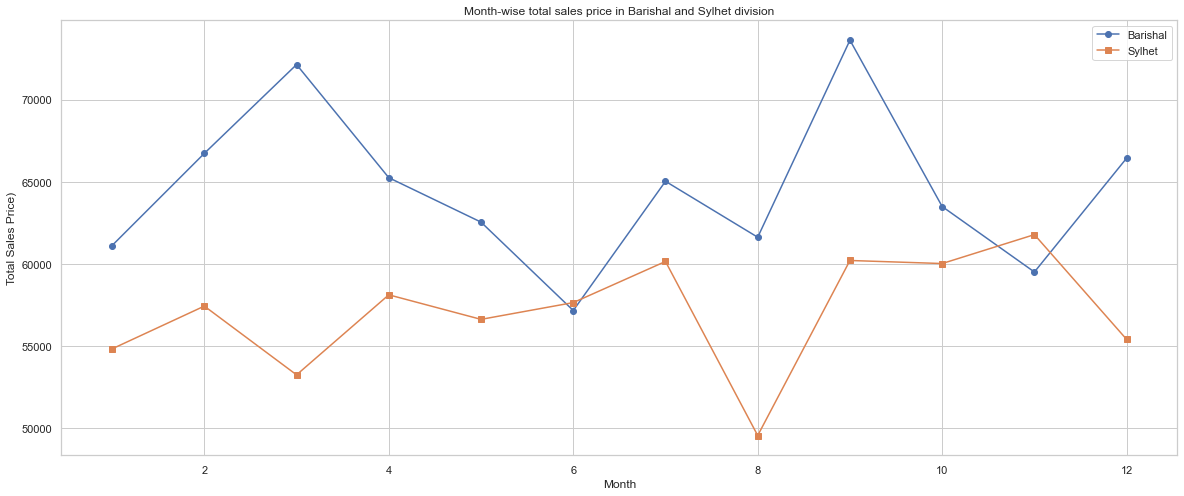

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))
plt.plot(barishal_div_groupby['month'], barishal_div_groupby['total_price'], marker='o')
plt.plot(sylhet_div_groupby['month'], sylhet_div_groupby['total_price'], marker='s')
plt.xlabel('Month')
plt.ylabel('Total Sales Price)')
plt.title("Month-wise total sales price in Barishal and Sylhet division")
plt.legend(['Barishal', 'Sylhet'])

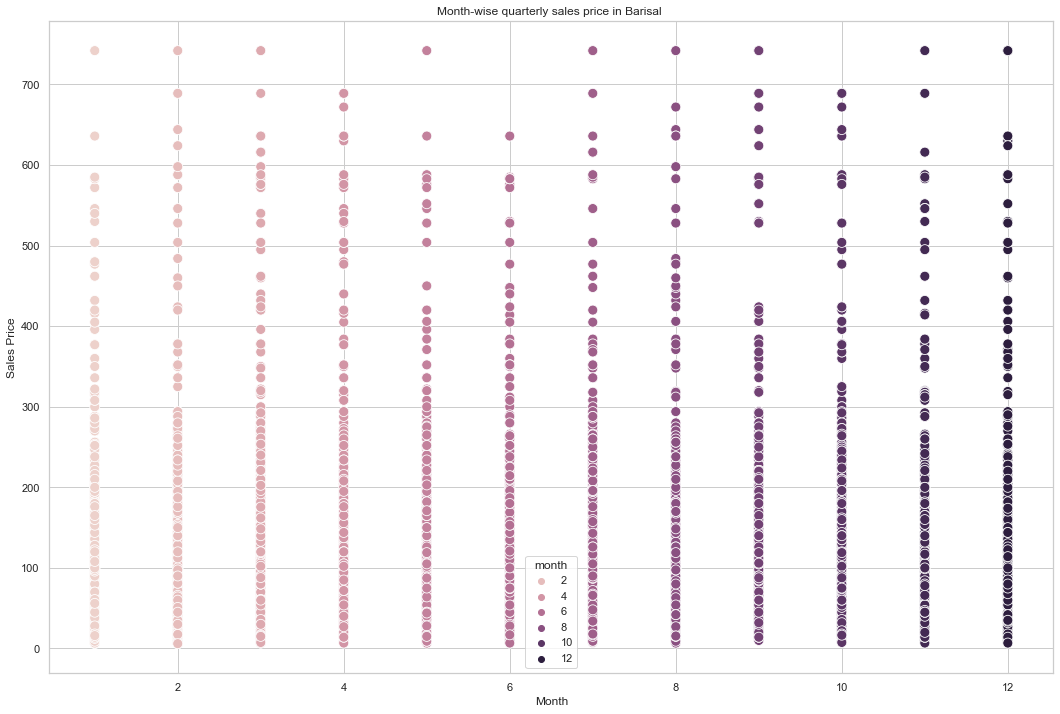

In [39]:
plt.figure(figsize=(18, 12))
plt.title('Month-wise quarterly sales price in Barisal ')
plt.xlabel("Month")
plt.ylabel("Sales Price")
sns.scatterplot(x=month_wise_barishal_x, 
                y=month_wise_barishal_y,  
                hue=barishal_division.month,
               s=100);

In [40]:
month_wise_sylhet_x = sylhet_division['month']

In [41]:
month_wise_sylhet_x

213      2
214      7
215     11
216      4
217      5
        ..
9995     9
9996     1
9997     8
9998     4
9999     1
Name: month, Length: 4662, dtype: int64

In [42]:
month_wise_sylhet_y = sylhet_division['total_price']

In [43]:
month_wise_sylhet_y

213     169.0
214     135.0
215      17.0
216     121.0
217     315.0
        ...  
9995    135.0
9996    180.0
9997     90.0
9998    216.0
9999    160.0
Name: total_price, Length: 4662, dtype: float64

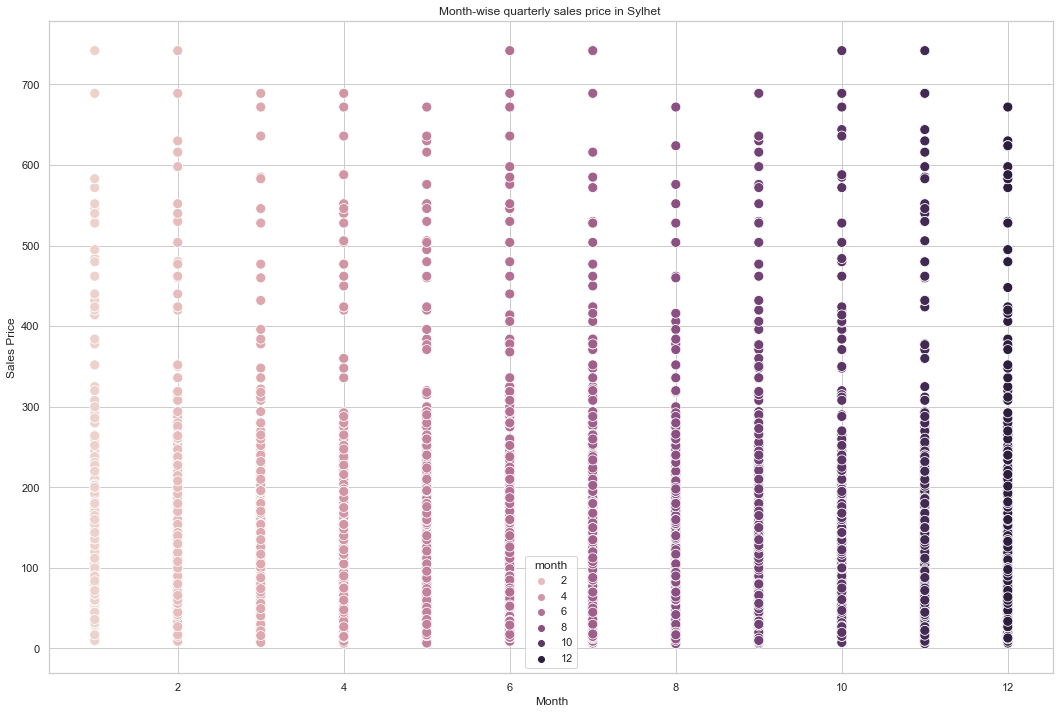

In [44]:
plt.figure(figsize=(18, 12))
plt.title('Month-wise quarterly sales price in Sylhet ')
plt.xlabel("Month")
plt.ylabel("Sales Price")
sns.scatterplot(x=month_wise_sylhet_x, 
                y=month_wise_sylhet_y,  
                hue=sylhet_division.month,
               s=100);

In [45]:
'''Q4.What are the average sales price of items per store quarterly? Show the data in a line chart'''

'Q4.What are the average sales price of items per store quarterly? Show the data in a line chart'

In [24]:
add_time_customer_with_fact = pd.merge(pd.merge(fact_table, time_dim, on='time_key'), customer_dim, on='customer_key')

In [25]:
add_time_customer_with_fact

,trans_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,week,month,quarter,year,name,contact_no,nid,upazila,district,division
0,T002,C000013,T07440,I00054,S0012,3,ct,45.0,135.0,10-02-2019 12:40,...,2nd Week,2,Q1,2019,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
1,T008,C000013,T07965,I00069,S0008,10,ct,32.0,320.0,20-11-2015 18:48,...,3rd Week,11,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
2,T005,C000013,T04797,I00063,S0010,8,ct,14.0,112.0,31-12-2015 02:05,...,4th Week,12,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
3,T006,C000013,T02801,I00060,S0008,9,pk,18.0,162.0,03-12-2020 15:58,...,1st Week,12,Q4,2020,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
4,T007,C000013,T04632,I00016,S0009,1,bottles,18.0,18.0,12-11-2014 20:59,...,2nd Week,11,Q4,2014,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,T004,C000037,T02461,I00053,S0010,9,ct,15.0,135.0,08-09-2018 11:14,...,2nd Week,9,Q3,2018,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9996,T010,C000037,T09156,I00005,S0008,9,bottles,20.0,180.0,19-01-2016 04:36,...,3rd Week,1,Q1,2016,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9997,T009,C000037,T02683,I00034,S0015,6,tubs,15.0,90.0,27-08-2020 23:12,...,4th Week,8,Q3,2020,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9998,T004,C000037,T09372,I00015,S0001,12,bottles,18.0,216.0,03-04-2014 10:56,...,1st Week,4,Q2,2014,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet


In [26]:
item_key_quarter_groupby = add_time_customer_with_fact.groupby(['item_key', 'quarter']).agg({'total_price': 'mean'}).reset_index()

In [27]:
item_key_quarter_groupby

,item_key,quarter,total_price
0,I00001,Q1,134.473684
1,I00001,Q2,144.375000
2,I00001,Q3,122.500000
3,I00001,Q4,145.833333
4,I00002,Q1,122.960526
...,...,...,...
271,I00068,Q4,168.000000
272,I00069,Q1,212.114286
273,I00069,Q2,236.972973
274,I00069,Q3,277.052632


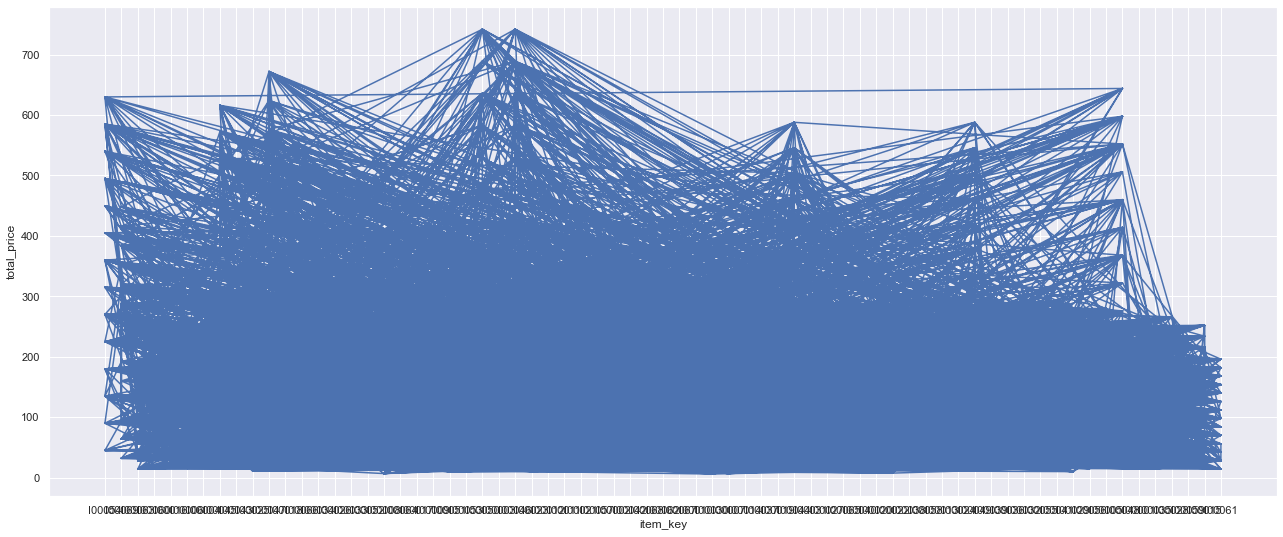

In [30]:
plt.figure(figsize=(22, 9))
plt.plot(add_time_customer_with_fact.item_key, add_time_customer_with_fact.total_price)
plt.xlabel('item_key')
plt.ylabel('total_price');

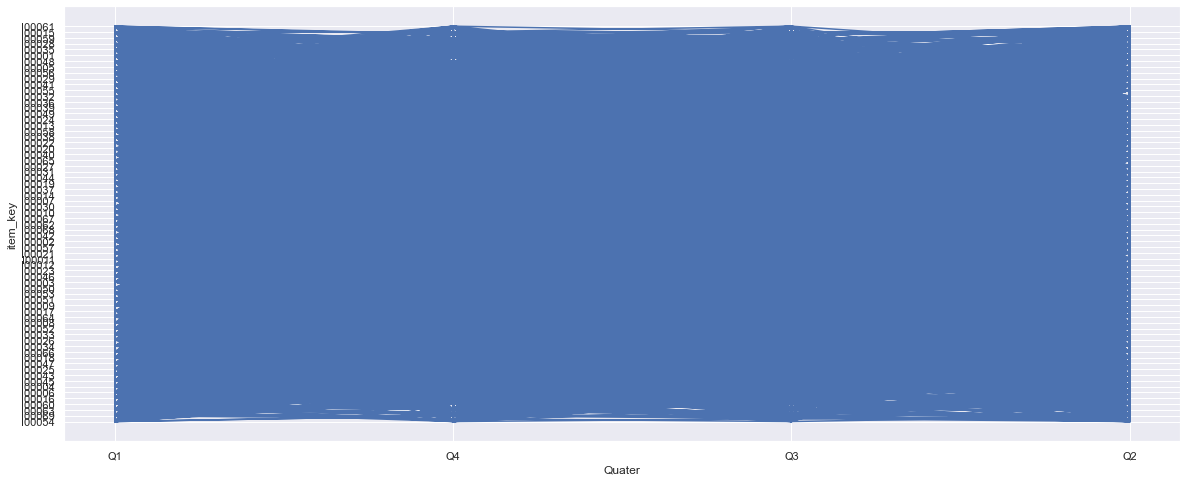

In [31]:
plt.figure(figsize=(20, 8))
plt.plot(add_time_customer_with_fact.quarter, add_time_customer_with_fact.item_key)
plt.xlabel('Quater')
plt.ylabel('item_key');


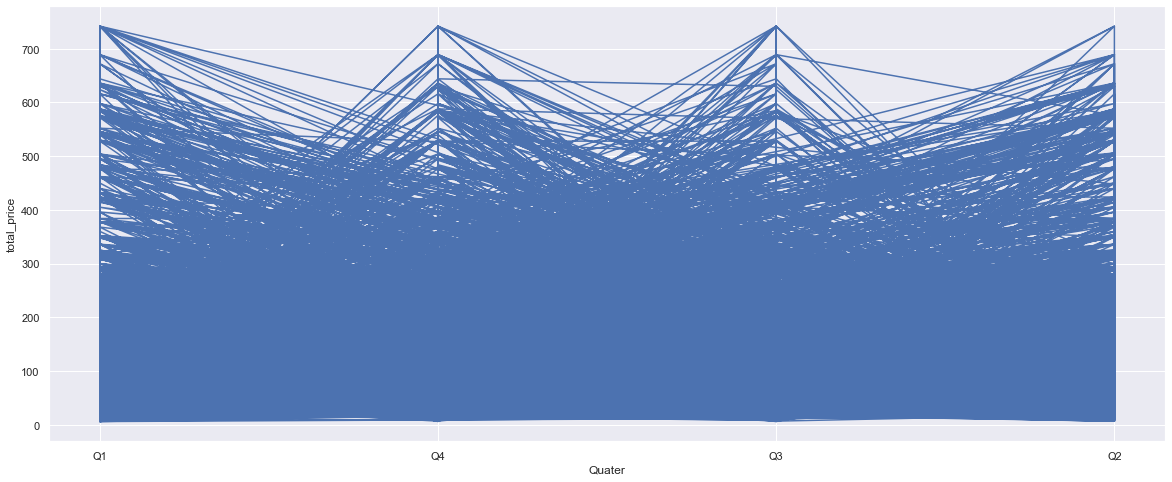

In [32]:
plt.figure(figsize=(20, 8))
plt.plot(add_time_customer_with_fact.quarter, add_time_customer_with_fact.total_price)
plt.xlabel('Quater')
plt.ylabel('total_price');

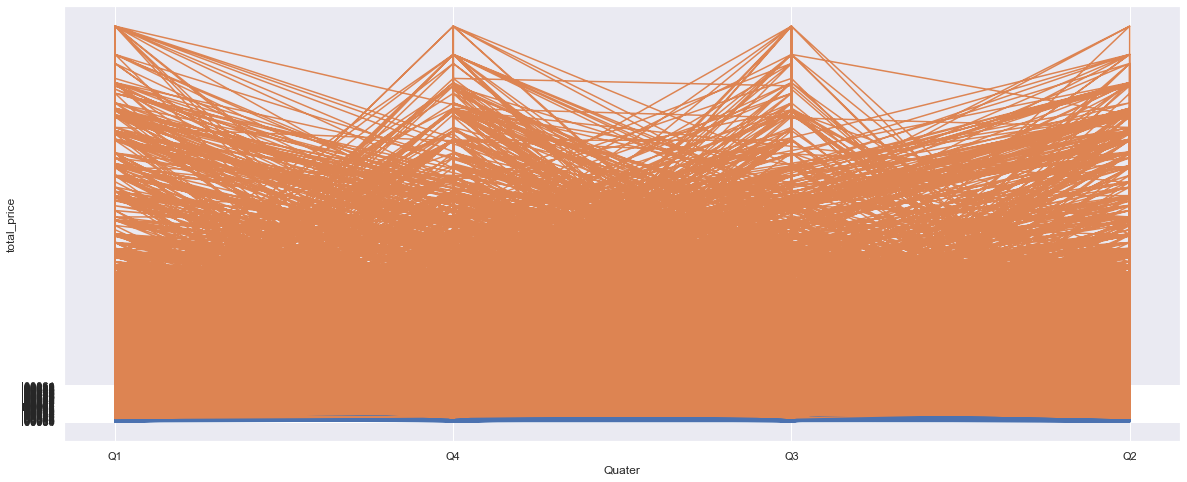

In [33]:
plt.figure(figsize=(20, 8))
plt.plot(add_time_customer_with_fact.quarter, add_time_customer_with_fact.item_key)
plt.plot(add_time_customer_with_fact.quarter, add_time_customer_with_fact.total_price)
plt.xlabel('Quater')
plt.ylabel('total_price');